# Análise e Visualização de Dados do Datalogger Inercial

Este notebook carrega o arquivo `dados.csv` gerado pelo PICO DATALOGGER INERCIAL, processa os dados e plota os gráficos de aceleração e velocidade angular ao longo do tempo.

In [8]:
# Célula 1: Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Passo 1: Carregar os Dados do Arquivo CSV

Certifique-se de que o arquivo `dados.csv` está na mesma pasta que este notebook, ou forneça o caminho completo para o arquivo.

In [9]:
# Célula 2: Leitura do arquivo e criação do DataFrame
file_path = 'dados1.csv'

try:
    df = pd.read_csv(file_path)
    
    # Combina as colunas de Data e Tempo em uma única coluna 'Timestamp' do tipo datetime
    df['Timestamp'] = pd.to_datetime(df['Data'] + ' ' + df['Tempo'])
    
    # Remove as colunas antigas de Data e Tempo, se desejado
    df = df.drop(columns=['Data', 'Tempo'])
    
    # Exibe as primeiras 5 linhas para verificação
    print("Dados carregados com sucesso!")
    display(df.head())
except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado. Verifique o caminho e o nome do arquivo.")

Dados carregados com sucesso!


,X_ACLR,Y_ACLR,z_ACLR,X_GYRO,Y_GYRO,Z_GYRO,Timestamp
0,-3664,-1992,15228,610,269,-360,2025-08-12 09:10:09
1,-3788,-2556,14168,-338,-481,175,2025-08-12 16:36:45
2,-5192,1980,14060,5798,4287,-4860,2025-08-12 23:52:56
3,-7040,-2492,16072,-2578,-1779,3597,2025-08-13 07:09:04
4,-316,-13292,23488,-12009,13024,-4200,2025-08-13 14:25:19


## Passo 2: Converter Dados Brutos para Unidades Físicas

O sensor MPU6050 retorna valores inteiros brutos (LSB - Least Significant Bit). Para uma análise correta, precisamos convertê-los para unidades físicas:
- **Acelerômetro:** para `g` (aceleração da gravidade).
- **Giroscópio:** para `°/s` (graus por segundo).

A conversão depende da sensibilidade configurada no sensor:
- **Sensibilidade do Acelerômetro:** ±2g, que corresponde a um fator de **16384 LSB/g**.
- **Sensibilidade do Giroscópio:** ±250 °/s, que corresponde a um fator de **131 LSB/(°/s)**.


In [13]:
# Célula 3: Fatores de conversão e criação de novas colunas
ACCEL_SENSITIVITY = 16384.0
GYRO_SENSITIVITY = 131.0

# Converte as colunas do acelerômetro
df['Ax_g'] = df['X_ACLR'] / ACCEL_SENSITIVITY
df['Ay_g'] = df['Y_ACLR'] / ACCEL_SENSITIVITY
df['Az_g'] = df['z_ACLR'] / ACCEL_SENSITIVITY

# Converte as colunas do giroscópio
df['Gx_dps'] = df['X_GYRO'] / GYRO_SENSITIVITY
df['Gy_dps'] = df['Y_GYRO'] / GYRO_SENSITIVITY
df['Gz_dps'] = df['Z_GYRO'] / GYRO_SENSITIVITY

print("Novas colunas com unidades físicas adicionadas:")
display(df.head())

Novas colunas com unidades físicas adicionadas:


,X_ACLR,Y_ACLR,z_ACLR,X_GYRO,Y_GYRO,Z_GYRO,Timestamp,Ax_g,Ay_g,Az_g,Gx_dps,Gy_dps,Gz_dps
0,-3664,-1992,15228,610,269,-360,2025-08-12 09:10:09,-0.223633,-0.121582,0.929443,4.656489,2.053435,-2.748092
1,-3788,-2556,14168,-338,-481,175,2025-08-12 16:36:45,-0.231201,-0.156006,0.864746,-2.580153,-3.671756,1.335878
2,-5192,1980,14060,5798,4287,-4860,2025-08-12 23:52:56,-0.316895,0.120850,0.858154,44.259542,32.725191,-37.099237
3,-7040,-2492,16072,-2578,-1779,3597,2025-08-13 07:09:04,-0.429688,-0.152100,0.980957,-19.679389,-13.580153,27.458015
4,-316,-13292,23488,-12009,13024,-4200,2025-08-13 14:25:19,-0.019287,-0.811279,1.433594,-91.671756,99.419847,-32.061069


## Passo 3: Visualização dos Dados

Agora, vamos plotar os dados convertidos para visualizar o comportamento do sistema ao longo do tempo.

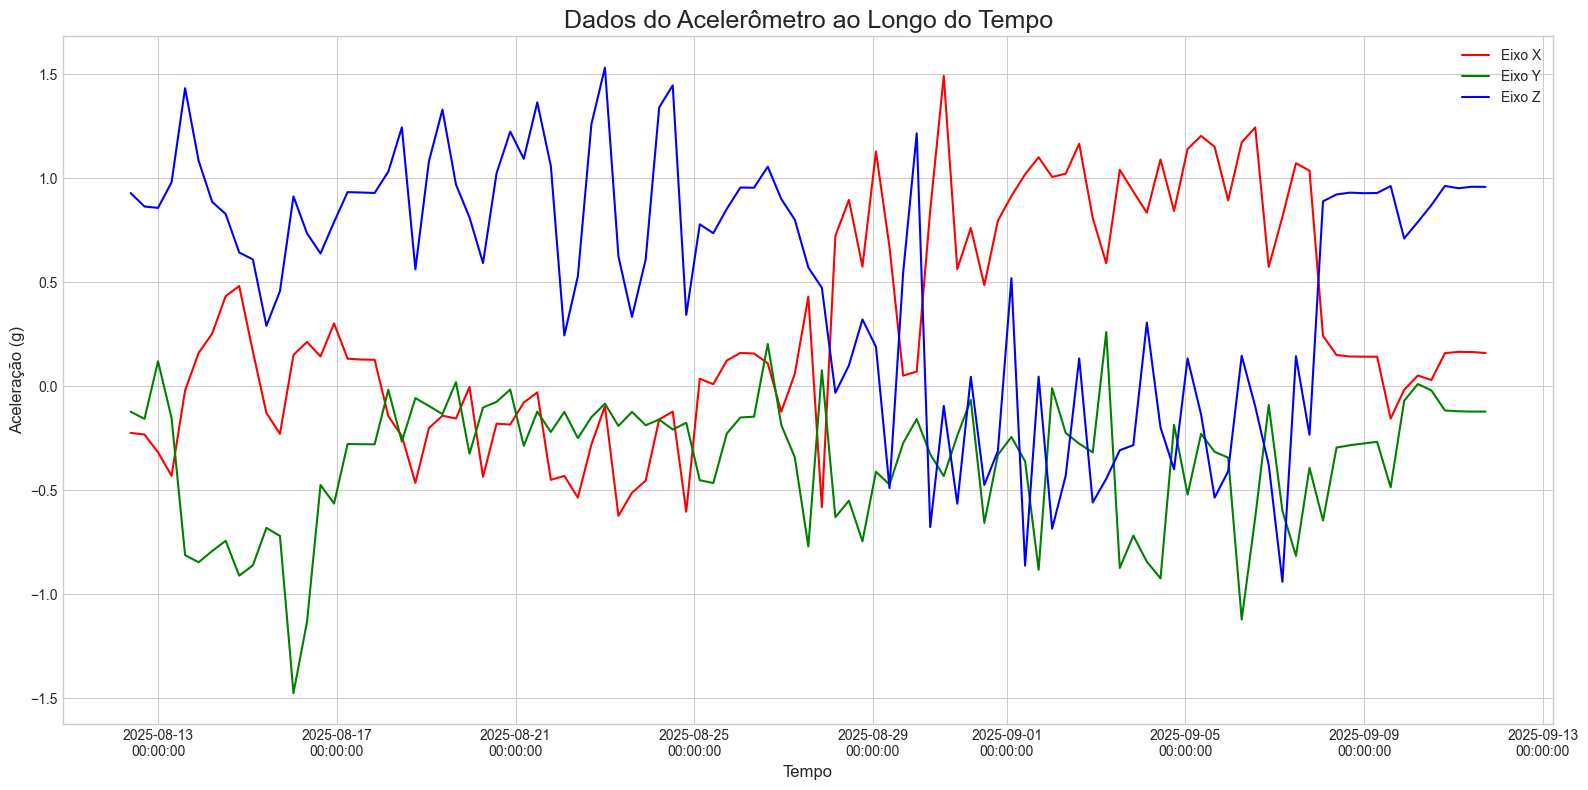

In [14]:
# Célula 4: Plotar os dados do Acelerômetro

plt.style.use('seaborn-v0_8-whitegrid') # Define um estilo visual agradável
fig, ax = plt.subplots(figsize=(16, 8)) # Cria a figura e os eixos

ax.plot(df['Timestamp'], df['Ax_g'], label='Eixo X', color='r')
ax.plot(df['Timestamp'], df['Ay_g'], label='Eixo Y', color='g')
ax.plot(df['Timestamp'], df['Az_g'], label='Eixo Z', color='b')

# Formatação do Gráfico
ax.set_title('Dados do Acelerômetro ao Longo do Tempo', fontsize=18)
ax.set_xlabel('Tempo', fontsize=12)
ax.set_ylabel('Aceleração (g)', fontsize=12)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True)

# Formata o eixo X para exibir a data e hora de forma legível
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M:%S'))
plt.xticks(rotation=0, ha='center')
fig.tight_layout() # Ajusta o layout para evitar sobreposição

plt.show()

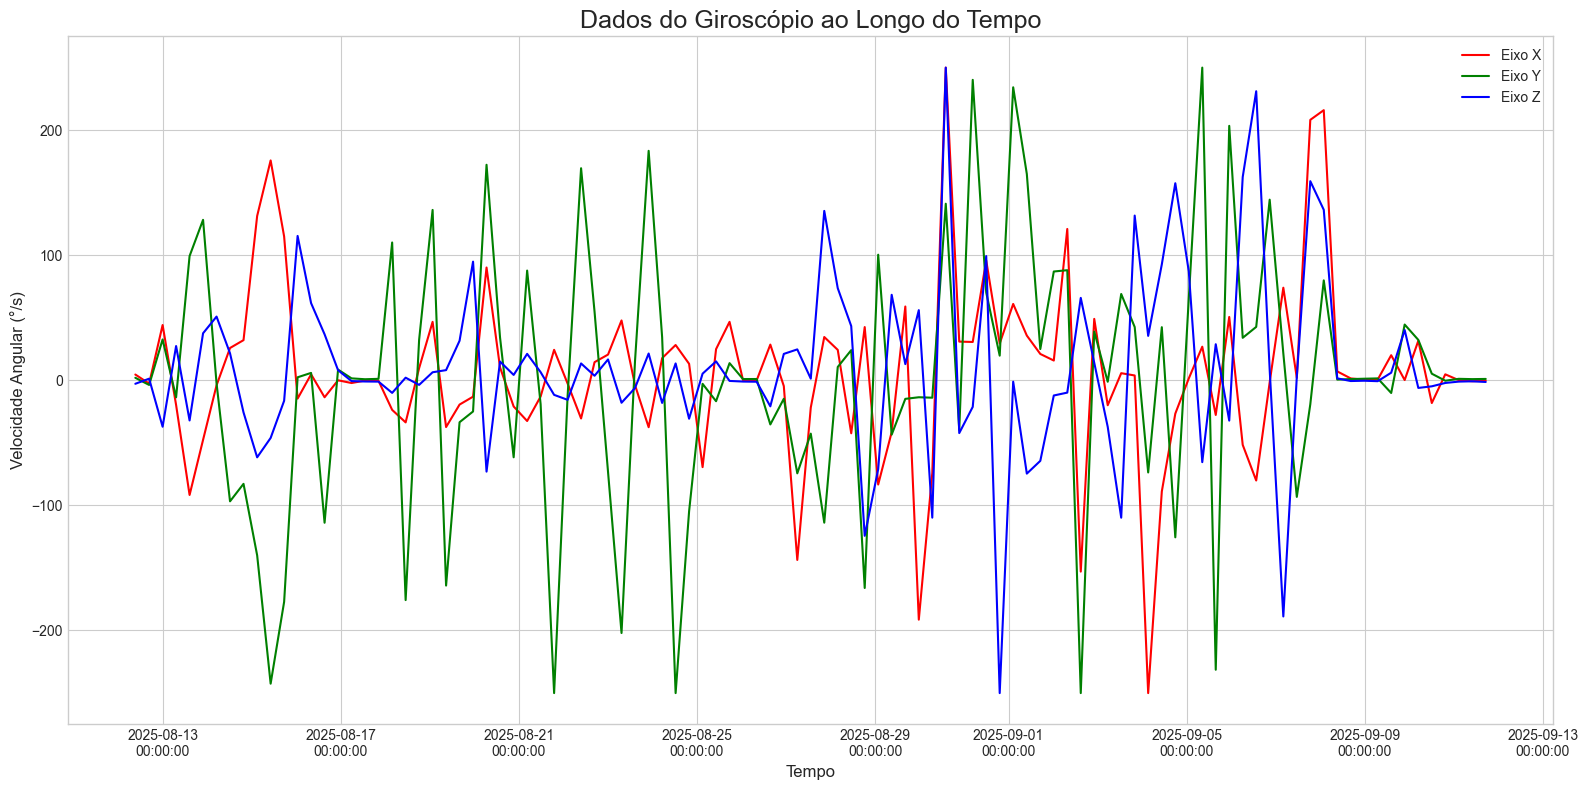

In [12]:
# Célula 5: Plotar os dados do Giroscópio

fig, ax = plt.subplots(figsize=(16, 8)) # Cria uma nova figura e eixos

ax.plot(df['Timestamp'], df['Gx_dps'], label='Eixo X', color='r')
ax.plot(df['Timestamp'], df['Gy_dps'], label='Eixo Y', color='g')
ax.plot(df['Timestamp'], df['Gz_dps'], label='Eixo Z', color='b')

# Formatação do Gráfico
ax.set_title('Dados do Giroscópio ao Longo do Tempo', fontsize=18)
ax.set_xlabel('Tempo', fontsize=12)
ax.set_ylabel('Velocidade Angular (°/s)', fontsize=12)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True)

# Formata o eixo X para exibir a data e hora de forma legível
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M:%S'))
plt.xticks(rotation=0, ha='center')
fig.tight_layout()

plt.show()